Importing the Packages

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

Loading the Dataset

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training Images:',x_train.shape)
print('Testing Images:',x_test.shape)
input_shape = x_train[0].shape
print(input_shape)

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)
(32, 32, 3)


Displaying the Dataset

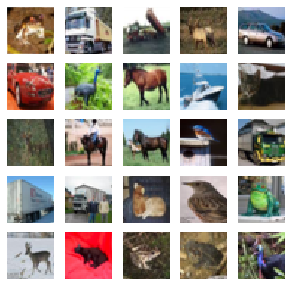

In [ ]:
fig, axs = plt.subplots(5, 5, figsize = (5,5))
for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  fig.show()

Preprocessing The Data

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
n_classes = 10

print('Shape before one-hot encoding', y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print('Shape after one-hot encoding', y_train.shape)


Shape before one-hot encoding (50000, 1)
Shape after one-hot encoding (50000, 10)


Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten

model = Sequential()

#convolutional layer
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = input_shape))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(.25))

model.add(Conv2D(125, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(.4))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(.3))

#output layer
model.add(Dense(10, activation = 'softmax'))




Compile and Training the Model

In [ ]:
#compling 
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
#traing the model
model.fit(x_train, y_train, batch_size = 128, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
391/391 [==============================] - 598s 2s/step - loss: 1.6200 - accuracy: 0.4039 - val_loss: 1.1776 - val_accuracy: 0.5795
Epoch 2/20
391/391 [==============================] - 651s 2s/step - loss: 1.1207 - accuracy: 0.6022 - val_loss: 0.9018 - val_accuracy: 0.6916
Epoch 3/20
391/391 [==============================] - 557s 1s/step - loss: 0.9242 - accuracy: 0.6765 - val_loss: 0.8356 - val_accuracy: 0.7156
Epoch 4/20
391/391 [==============================] - 551s 1s/step - loss: 0.8111 - accuracy: 0.7171 - val_loss: 0.7379 - val_accuracy: 0.7421
Epoch 5/20
391/391 [==============================] - 552s 1s/step - loss: 0.7209 - accuracy: 0.7476 - val_loss: 0.7267 - val_accuracy: 0.7485
Epoch 6/20
391/391 [==============================] - 553s 1s/step - loss: 0.6586 - accuracy: 0.7688 - val_loss: 0.6884 - val_accuracy: 0.7601
Epoch 7/20
391/391 [==============================] - 551s 1s/step - loss: 0.6077 - accuracy: 0.7860 - val_loss: 0.6549 - val_accuracy: 0.7734

Predicting

In [ ]:
classes = range(0,10)
names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

class_labels = dict(zip(classes,names))
batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis= -1)
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 252ms/step


In [ ]:
print(predictions)

NameError: ignored

In [ ]:
for image in predictions:
  print(sum(image))

1.000000037085215
1.0000000500335773
1.0000000824837048
0.9999999645224307
1.0000000144004233
0.9999999907506707
1.0000000773094797
1.0000000678958607
1.000000059801773


In [ ]:
class_result = np.argmax(predictions,axis = -1)
print(class_result)

[7 5 6 3 1 1 2 6 8]


Final Object Detection

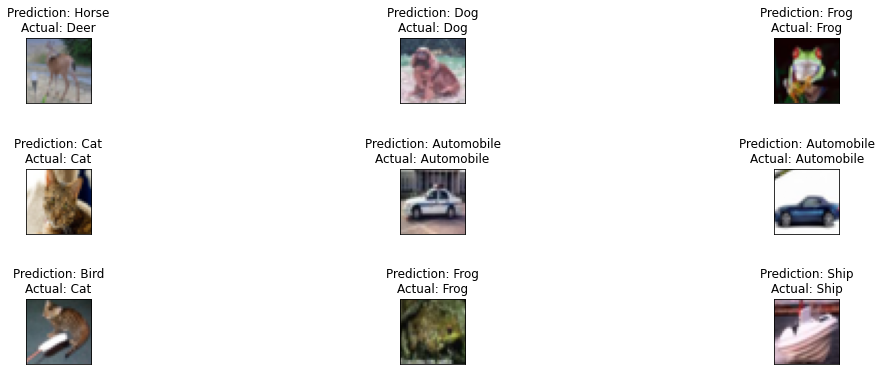

In [ ]:
fig, axs = plt.subplots(3,3, figsize = (19,6))
fig.subplots_adjust(hspace =1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  #show the img
  axs[i].imshow(img)

#show the plot
plt.show()   
      